In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
train1 = pd.read_csv("train(1).csv")
test = pd.read_csv("test2.csv")

print(train1.shape)
train1.describe()
train1.head()

(16209, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
train1.nunique()

,0
id,16110
date,366
price,3428
bedrooms,12
bathrooms,29
sqft_living,881
sqft_lot,8048
floors,6
waterfront,2
view,5


In [ ]:
train1.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

EDA

Feature Engineering

In [ ]:
import matplotlib.pyplot as plt

In [25]:
train1["date"] = pd.to_datetime(train1["date"])

In [26]:
train1["sale_year"] = train1["date"].dt.year
train1["sale_month"] = train1["date"].dt.month

In [27]:
train1["house_age"] = train1["sale_year"] - train1["yr_built"]
train1["renovated_flag"] = (train1["yr_renovated"] > 0).astype(int)

train1["log_price"] = np.log1p(train1["price"])

Price--> Target Variable Distribution

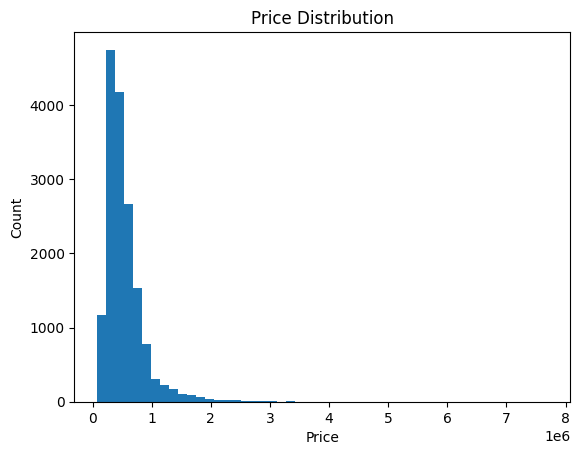

In [29]:
plt.figure()
plt.hist(train1["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

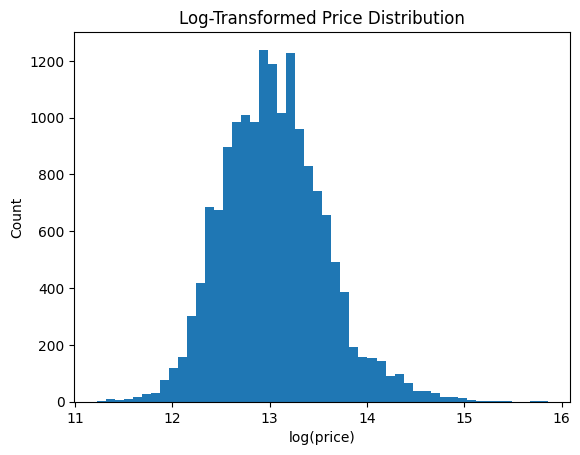

In [31]:
plt.figure()
plt.hist(train1["log_price"], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(price)")
plt.ylabel("Count")
plt.show()

Numerical Feature Distributions

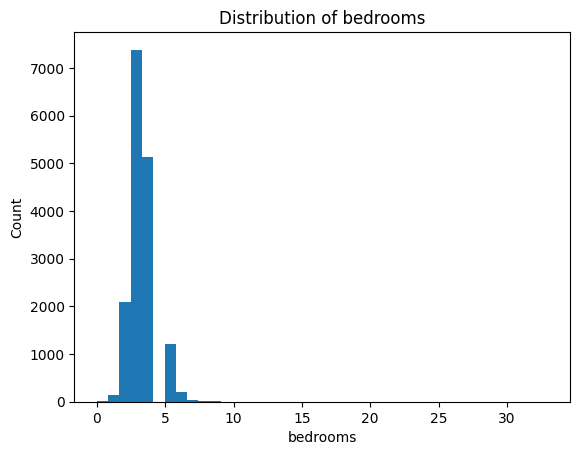

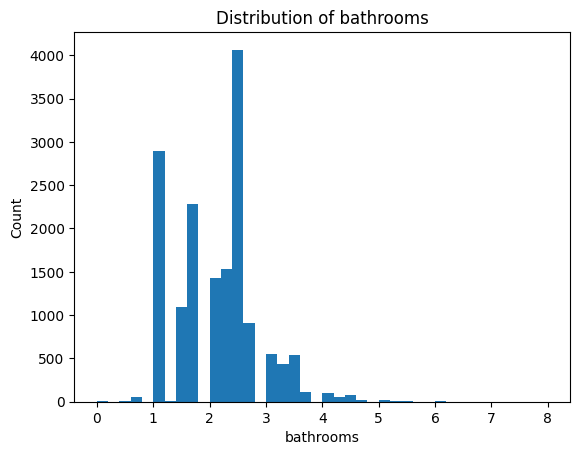

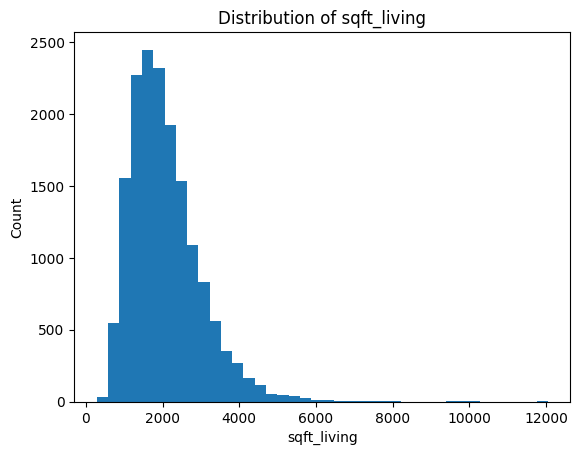

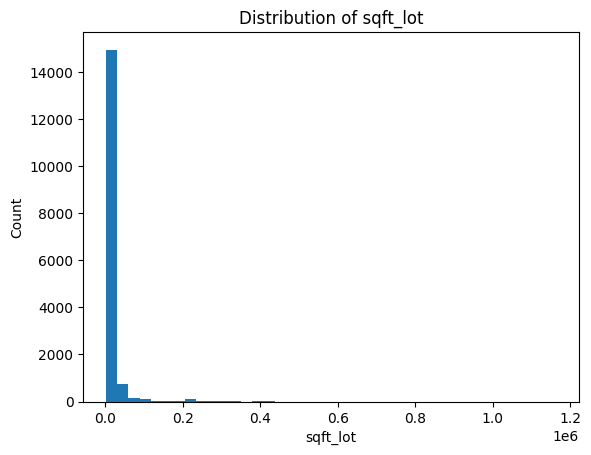

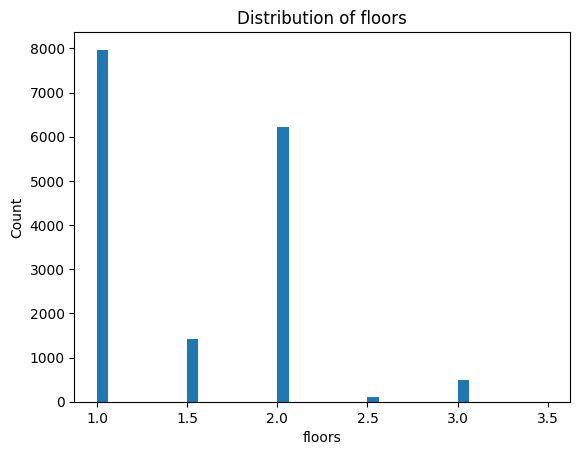

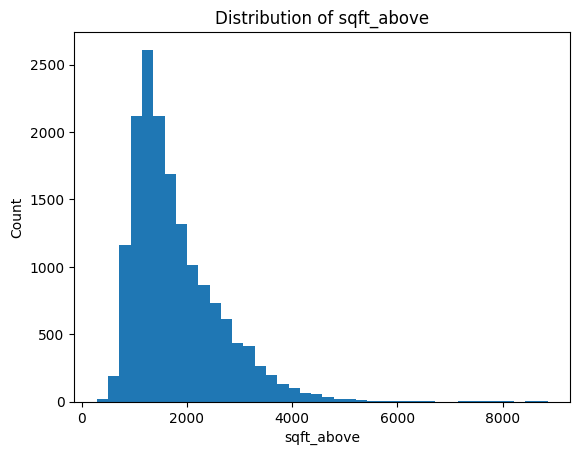

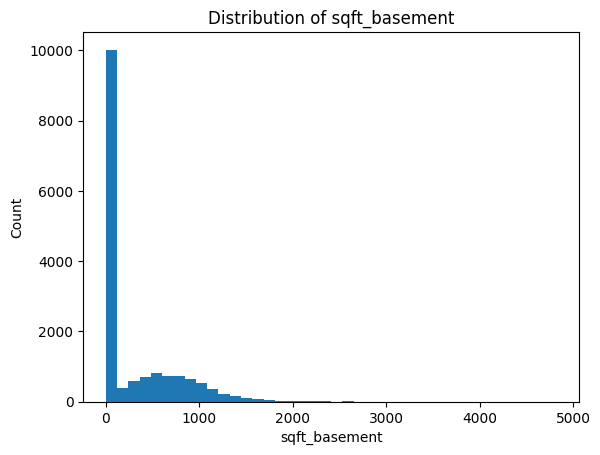

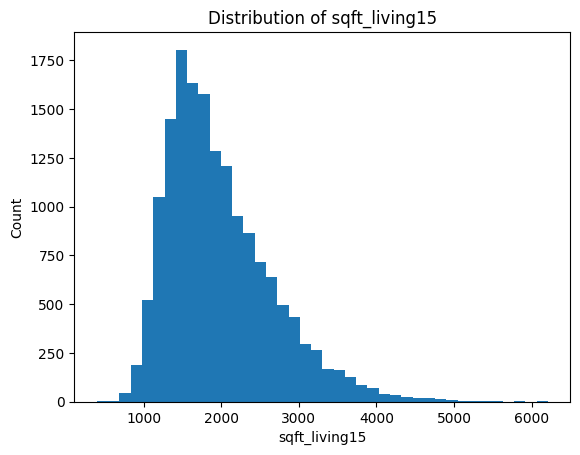

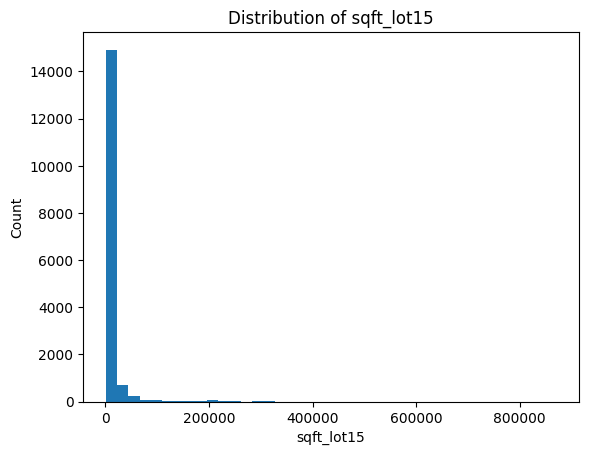

In [32]:
num_cols = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "sqft_above", "sqft_basement",
    "sqft_living15", "sqft_lot15"
]

for col in num_cols:
    plt.figure()
    plt.hist(train1[col], bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

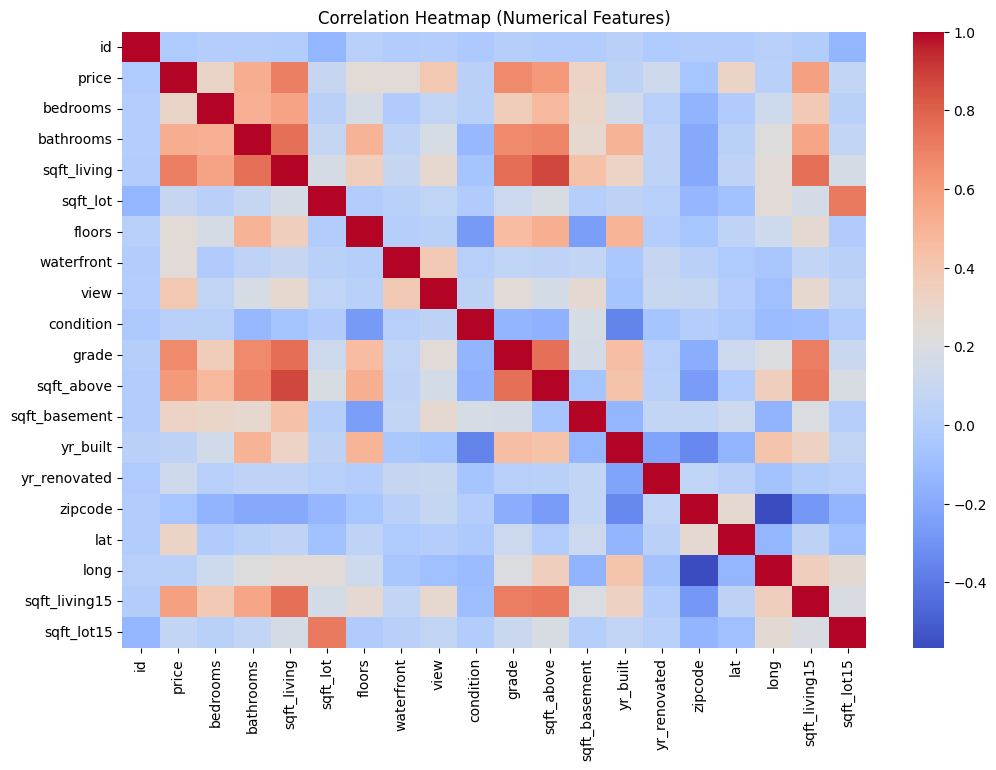

In [ ]:
numeric_df = train1.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Price vs Numerical Features

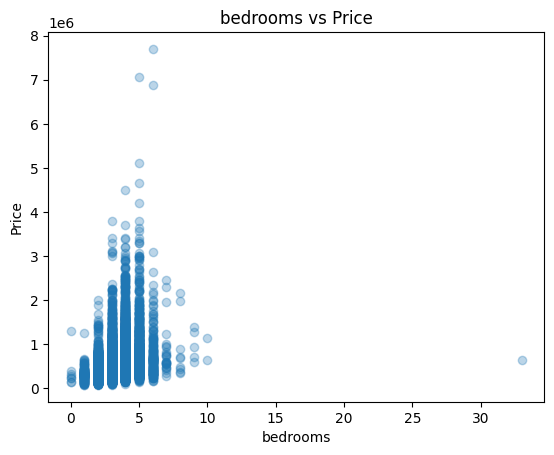

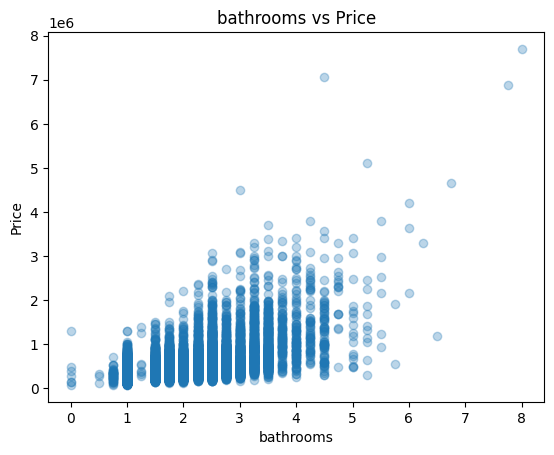

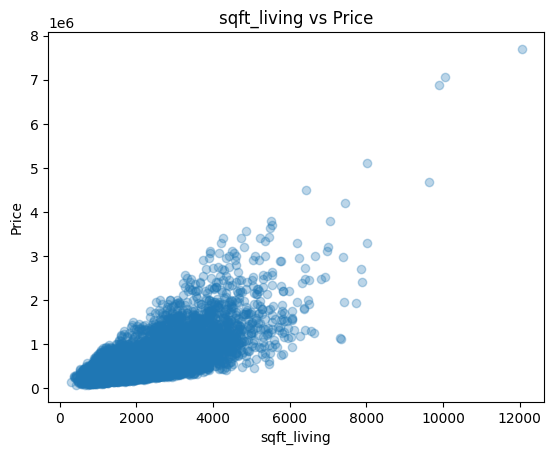

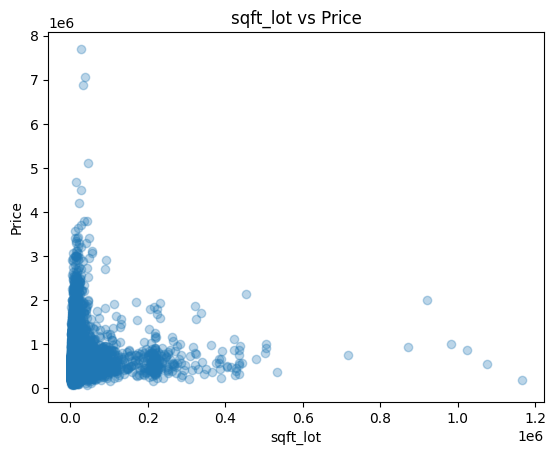

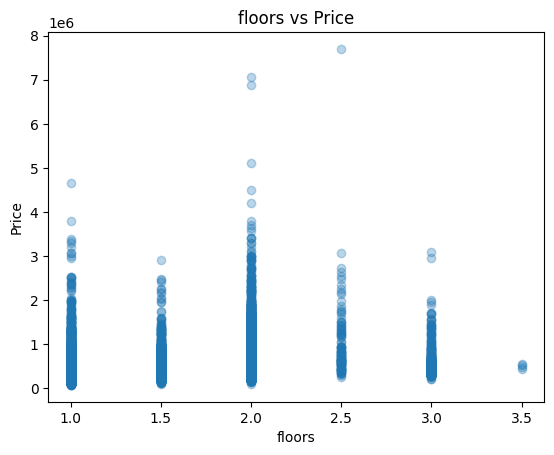

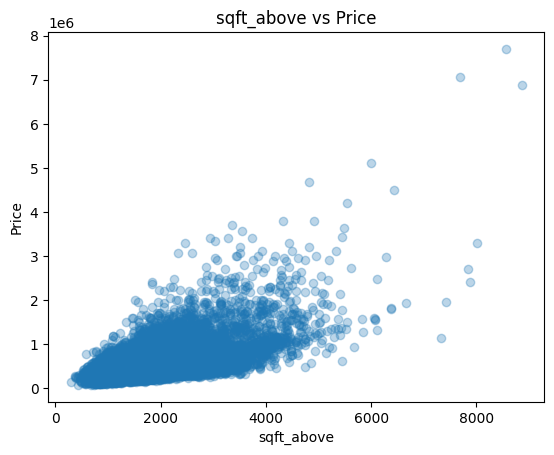

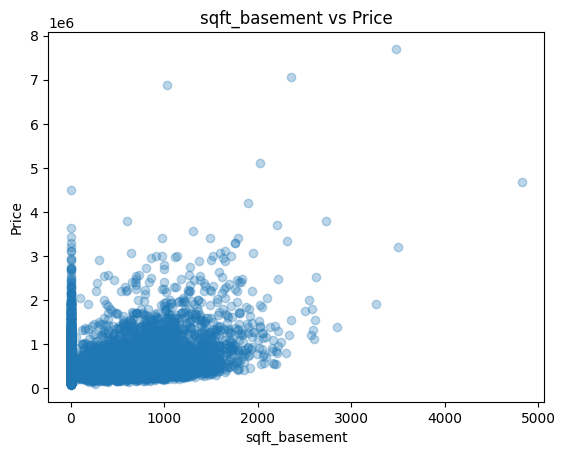

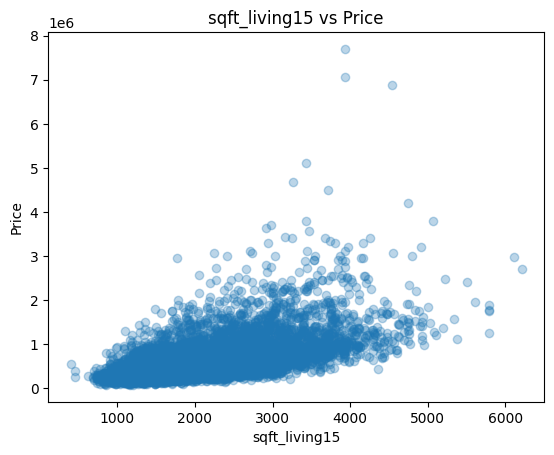

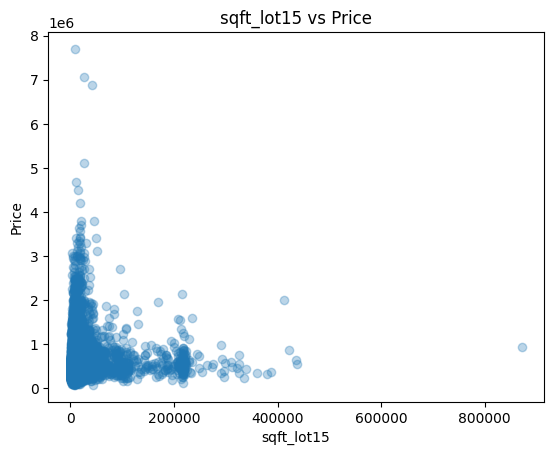

In [34]:
for col in num_cols:
    plt.figure()
    plt.scatter(train1[col], train1["price"], alpha=0.3)
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

Bedrooms & Bathrooms Analysis

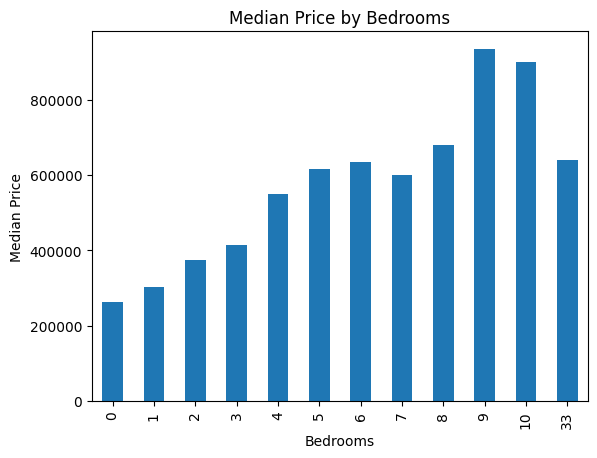

In [36]:
plt.figure()
train1.groupby("bedrooms")["price"].median().plot(kind="bar")
plt.title("Median Price by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Median Price")
plt.show()

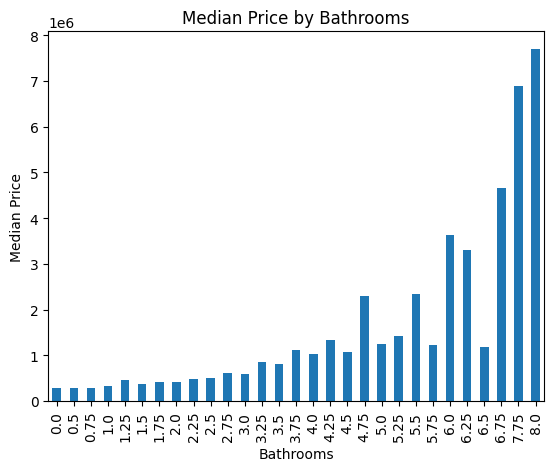

In [37]:
plt.figure()
train1.groupby("bathrooms")["price"].median().plot(kind="bar")
plt.title("Median Price by Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Median Price")
plt.show()

Categorical Feature

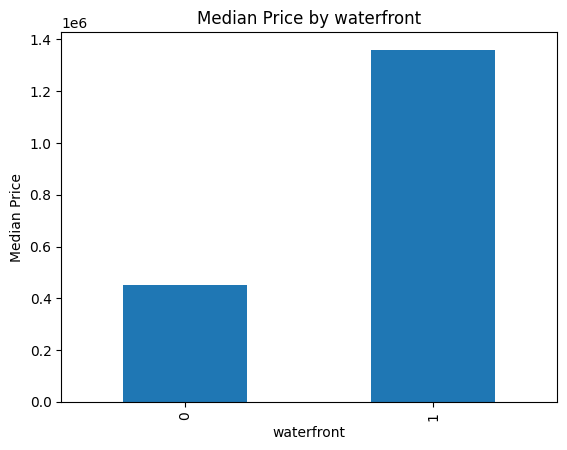

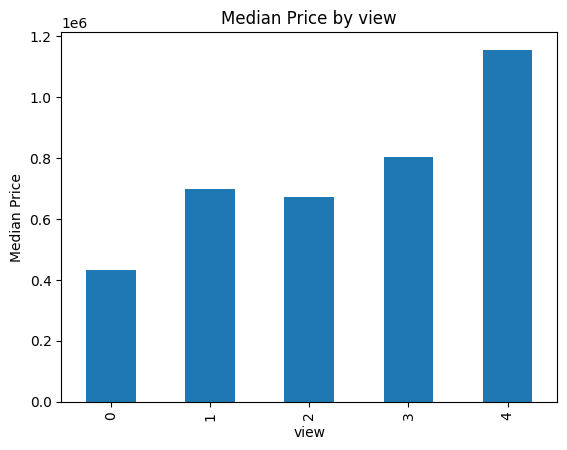

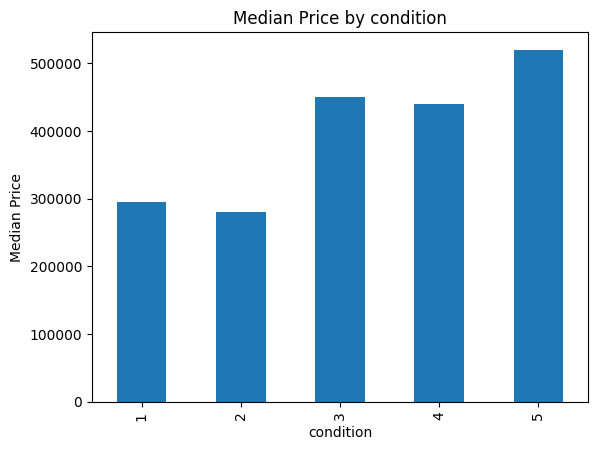

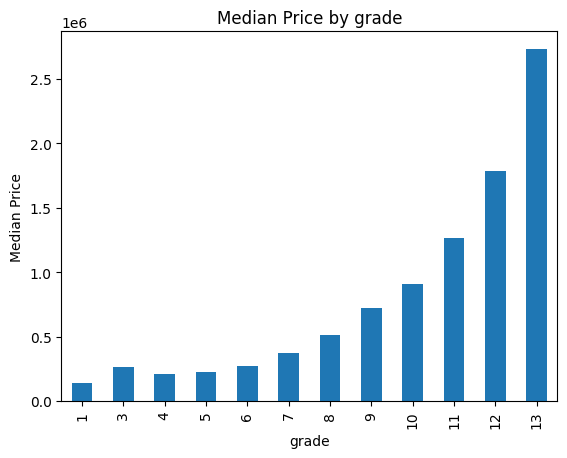

In [39]:
cat_cols = ["waterfront", "view", "condition", "grade"]

for col in cat_cols:
    plt.figure()
    train1.groupby(col)["price"].median().plot(kind="bar")
    plt.title(f"Median Price by {col}")
    plt.xlabel(col)
    plt.ylabel("Median Price")
    plt.show()

Renovation Effect

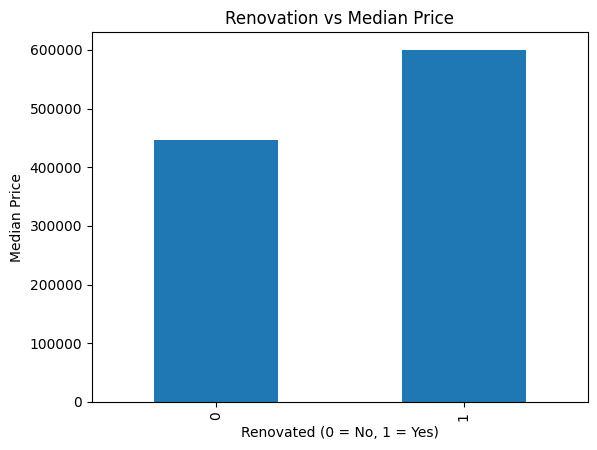

In [41]:
plt.figure()
train1.groupby("renovated_flag")["price"].median().plot(kind="bar")
plt.title("Renovation vs Median Price")
plt.xlabel("Renovated (0 = No, 1 = Yes)")
plt.ylabel("Median Price")
plt.show()

House Age Analysis

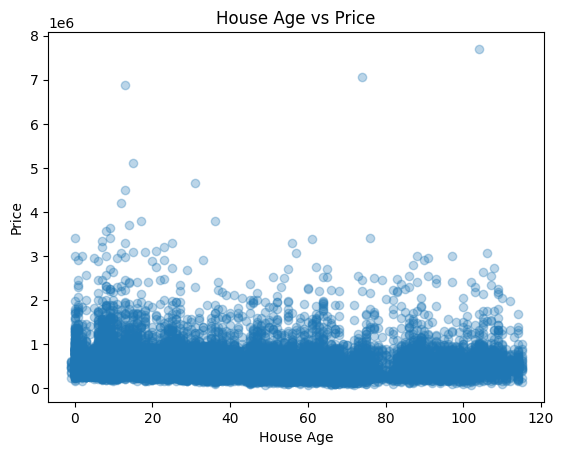

In [44]:
plt.figure()
plt.scatter(train1["house_age"], train1["price"], alpha=0.3)
plt.title("House Age vs Price")
plt.xlabel("House Age")
plt.ylabel("Price")
plt.show()

Correlation

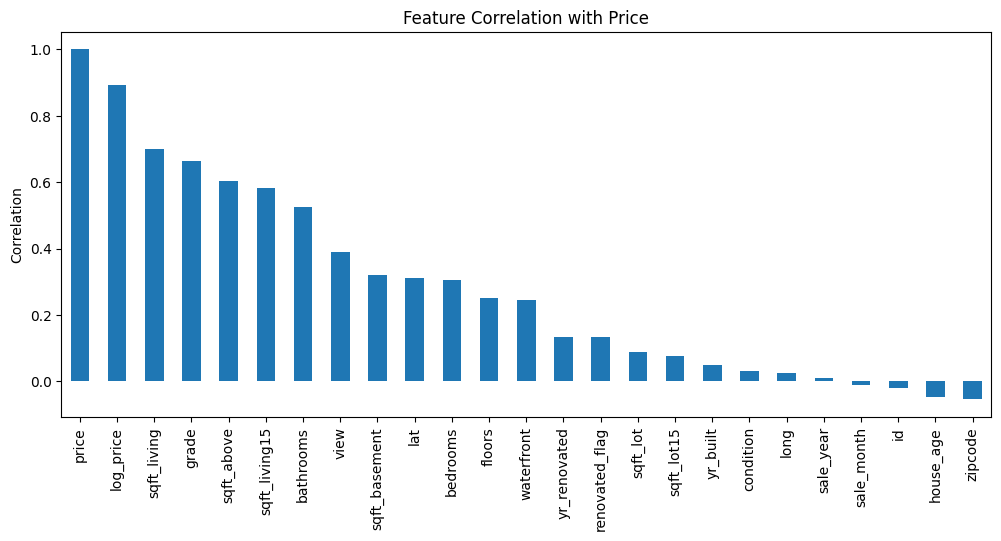

In [45]:
corr = train1.corr(numeric_only=True)

plt.figure(figsize=(12,5))
corr["price"].sort_values(ascending=False).plot(kind="bar")
plt.title("Feature Correlation with Price")
plt.ylabel("Correlation")
plt.show()


Outlier Detection

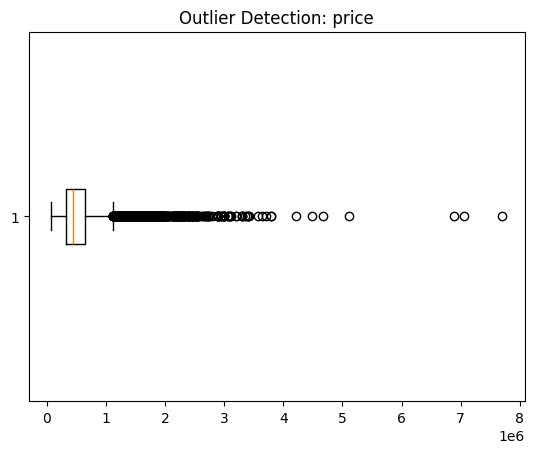

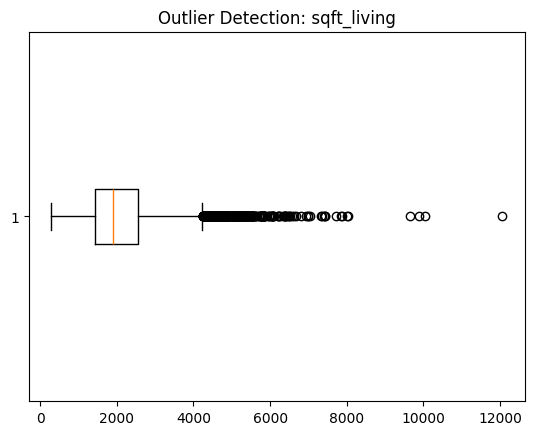

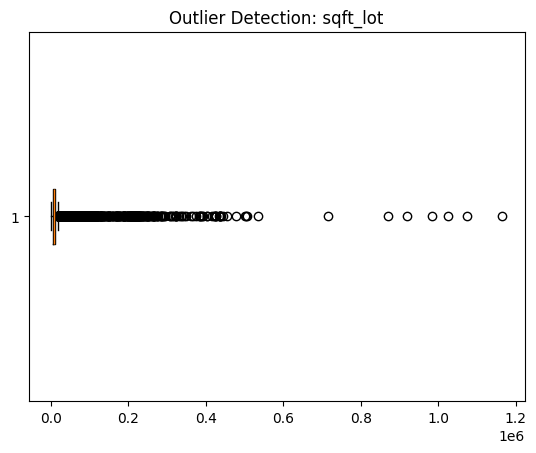

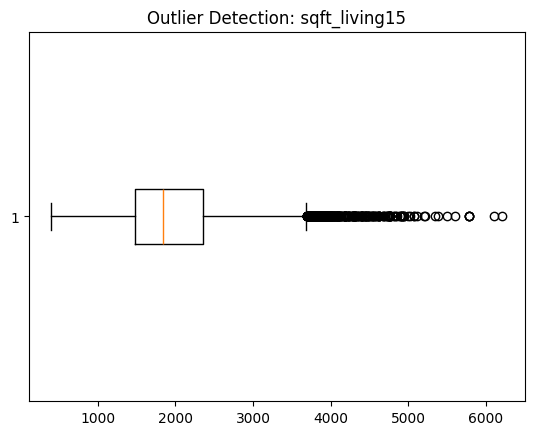

In [47]:
for col in ["price", "sqft_living", "sqft_lot", "sqft_living15"]:
    plt.figure()
    plt.boxplot(train1[col], vert=False)
    plt.title(f"Outlier Detection: {col}")
    plt.show()

Dropping useless columns like id, date

In [57]:
print(train1.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month', 'house_age',
       'renovated_flag', 'log_price'],
      dtype='object')


In [59]:
cols_to_drop = [c for c in ["id", "date"] if c in train1.columns]
train1.drop(columns=cols_to_drop, inplace=True)

Feature selection

In [84]:
corr = train1.corr(numeric_only=True)["log_price"].abs()
selected_corr_features = corr[corr > 0.3].index.tolist()

In [85]:
selected_corr_features

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'log_price']

In [86]:
target_cols = ["price", "log_price"]

features = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'view',
    'grade',
    'sqft_above',
    'sqft_basement',
    'lat',
    'sqft_living15',
    'log_price'
]

features = [f for f in features if f not in target_cols]

In [88]:
X = train1[features]
y = train1["log_price"]

In [89]:
print("Features:", X.columns.tolist())
print("Target:", y.name)

Features: ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
Target: log_price


Model training

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
X_train, X_val, y_train, y_val = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

In [94]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=50,
    learning_rate=0.05,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [95]:
y_pred = model.predict(X_val)

In [97]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(rmse, r2)

0.22784790171763092 0.8118718176866792


Saving the baseline models

In [102]:
import joblib

joblib.dump(model, "baseline_xgb_model.pkl")
joblib.dump(scaler, "baseline_scaler.pkl")
joblib.dump(features, "baseline_features.pkl")

['baseline_features.pkl']

Loading the baseline models

In [103]:
model = joblib.load("baseline_xgb_model.pkl")
scaler = joblib.load("baseline_scaler.pkl")
features = joblib.load("baseline_features.pkl")


Testing the model on test dataset

In [99]:
df_test = pd.read_csv("test2.csv")
df_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [100]:
df_test.shape

(5404, 20)

In [ ]:
features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'view',
    'grade',
    'sqft_above',
    'sqft_basement',
    'lat',
    'sqft_living15'
]

In [104]:
X_test = df_test[features]

In [105]:
print(X_test.shape)
print(X_test.dtypes)

(5404, 10)
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
view               int64
grade              int64
sqft_above         int64
sqft_basement      int64
lat              float64
sqft_living15      int64
dtype: object


In [107]:
y_test_log_pred = model.predict(X_test)

In [108]:
y_test_pred = np.expm1(y_test_log_pred)

In [109]:
submission = pd.DataFrame({
    "id": df_test["id"],
    "predicted_price": y_test_pred
})

submission.head()

,id,predicted_price
0,2591820310,2805534.50
1,7974200820,3838729.00
2,7701450110,3712528.25
3,9522300010,3875313.50
4,9510861140,3110150.50


In [110]:
submission.to_csv("price_predictions.csv", index=False)